## Boxplots
-------------------

### Introduction
------------------------------
The boxplot was first introduced by John Tukey in 1977 as part of his toolkit for exploratory data analytics and is now one of the most frequently utilised statistical graphs [1]. The traditional boxplot is typically used for univariate data exploration and for the comparison of several univariate variables [2]. It is constructed to display the median, the upper and lower quartiles, the interquartile range, the upper and lower extremes as well as any potential outlier data points (Fig 1). In addition to this,  a box plot can provide information on the spread of the data (by the length of the box and  the distance between the upper and lower extremes), skewness by the deviation of the median line from the centre of the box, and longtailedness by the distance between the ends of the whiskers relative to the length of the box [3].  


In [15]:
%%html
<img src = "img/boxplot.JPG">

Fig (1):  Annotated boxplot of 1000 points from a normal distbution with a mean of 100 and standard deviation of 20.[2]

There have been many alternatives and variations of the boxplot proposed in the literature. The purpose of this Juypter notebook was to demonstrate the creation and interpretation of a boxplot using commonly utilised python packages and the Titanic dataset (https://www.kaggle.com/c/titanic). In addition to this, several alternative and variations of the boxplot will be illustrated.

### Creating a Boxplot 
---------------------------------

After firstly loading the required packages, the Titanic dataset was imported and screened.   The Titanic dataset contains 13 demographic and travel features for 1,309 Titanic passengers and their survival status.  However, for the purpose of this assignment, our descriptive analysis will be delimited to the age and survival features. 

In [16]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
#confirm directory for your dataset
print(os)
#Read in data from a csv file
df = pd.read_csv('titanic3.csv') 
#print first 5 lines of imported data to see data types
df.head()
#Delimit data to the age and surival column
df = df[['age','survived']]

<module 'os' from 'C:\\Users\\Harvey Norman\\Ana\\Anaconda1\\lib\\os.py'>


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Data is screened for missing data and NaNs. Rather than inputing these values in anyway, these cells are dropped from the analysis. Finally boxplots of age for the binary survival metric is plotted (Fig 2).

Variations of the boxplot 
--------------------------

In [29]:
There are many varations of the boxplot

SyntaxError: invalid syntax (<ipython-input-29-b0312f9fb81f>, line 1)

C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 960x800 with 0 Axes>

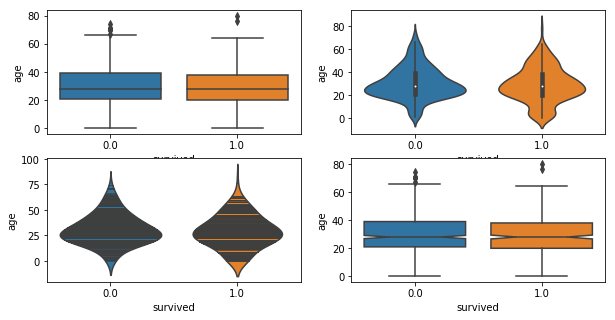

In [28]:
emptyidx = pd.isnull(df) 
if np.sum(np.sum(emptyidx)) >0 :
    df = df.dropna()

fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')    
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)
#set x and y axis data and create boxplot        
sns.boxplot(x = "survived", y="age", data = df, ax=ax[0][0])
sns.violinplot(x='survived', y='age',data=df, ax=ax[0][1])
sns.boxplot(x='survived', y='age',data=df, notch = True,ax=ax[1][1])
sns.violinplot(x="survived", y="age",data=df, inner="stick", bw=.5,ax=ax[1][0])
fig.show()

Fig(2) Boxplot of age grouped by the binary survival feature

### Visual interpretation of the boxplot based on Titantic dataset 
-------------------------------------------------------------

The boxplot above compares the age of passangers that survived (1.0) against those that died (0.0). 

Outliers

- The points above the whiskers identify potential outliers that need to be investigated.
- There apear to be 4 potential outliers in the group who survied and 2 in the group who did not survive.
- The potential outliers are more extremer in the group who did not survive in comparison to group who did survive.

Distribution 

- The median age of 28 is the same across both groups. 
- The lower quartile ranges from approximatily 1-20 years for both groups. 
- The upper quratile appears to be different for each group. The group who survived demonstrate values ranging from 39-62 while the group who did not survive demonstrate values ranging from 39-65.
- Interquartile ranges between 20-38 years and 21-39 years for the group who survived and group who did not respectively. 
- At first glance the group who did not survive appear to have a more positivly skewed distribution (longer upper whisker and off-centred median line) in comparision to the group who did survive. However, the presence of more extreme values in the group who survived may also cause this dataset to be postively skewed. 

Conclusions. 

Given the overlap of the interqurtile ranges and median values it would appear that the two groups are not linerly seperable on the age feature alone. The box plots are a usefull means of visualising and comparing univariate distribution and the visual inspection of the plot provides close estimates of the actual calculated values below.




In [ ]:
df.groupby('survived').describe()

### Alternatives to the boxplot
----------------------------------

There are many alternatives to the boxplot that can be used to show the distribution of univariate data. For example there are histograms, stem and leaf plots and density trees (Fig 3). However, these either take up a great deal of sapace and/or are difficult to compare between multiple variables as the plots become cluttered.[4] 


In [ ]:
# Plot histogram
target_0 = df.loc[df.survived == 0]
target_1 = df.loc[df.survived == 1]

plt.subplot(2,2,1)
sns.distplot(target_0.age)
sns.distplot(target_1.age)



### Variations of the boxplot 

The violinplot below displays the median as a dot and the interquartile range as a line rather than a box. 

#### Interpreting the violinplot
-------------------------------

* The median and the interquartile range are the same for both groups 
* There is a larger distribution of people that survived below 15 years of age compared to those that died.
* There is a larger distribution of people that died between 20 - 35 when compared to those that survived 
* A larger number 40-60 year olds survived when compared to those that died 

In conclusion more children below the age of 15 years survived


In [ ]:
sns.violinplot(x='survived', y='age',data=df)ax=ax[1]

#### Interpreting the notched boxplot 
------------------------------
The notched boxplot whilst simular to the boxplot contains the confidence interval around the median.

* The notched boxplot displays the medians overlap indicating that the medians are equal for both groups 

In [ ]:
sns.boxplot(x='survived', y='age',data=df, notch = True)

#### Interpreting the beanplot 
---------------------------------

The violinplot includes the number of datapoints displayed below as lines. 

* The interquartile range contains more datapoints for the unsurvived when compared to the survived 
* The plots display a small number of datapoints above 60 years old,indicating that there where few elderly passangers onboard 
* The is alos more observatios for the children that survived below the age of 3 when compared with the unsuvived group

In conclusion more passangers died that survied the disaster.

In [ ]:
sns.violinplot(x="survived", y="age",data=df, inner="stick", bw=.5)

### Alternatives to boxplots  

#### The Swarmplot graph
-------------------------

The swarmplot displays the size of the dataset by displaying the number of datapoints. This is something that the original boxplot does not display.

In [ ]:
sns.swarmplot(x="survived", y="age",data=df)

### Disadvantages with the boxplot 

1) Boxplots cannot show the distribution. For example if there is a bimodial distribution which displays to modes, this will not be visable on the boxplot. 

2) Boxplots do not display the original datpoints that make up your data.  

3) Boxplots can only be used with numerical data




#### The boxplot & Swarmplot

In [ ]:
x = df.describe()
print(x)

### Extra
----------------------


## When can a boxplot be used? 
-----------------------------------------------

* A boxplot can be used to show the distribution of data
* To help identify potential outliers. 
* Visually compare groups whilst taking into account the distribution of your data. 
* Used on a sample size of five or more [2]




### Variations of the boxplot 
--------------------------------

Due to their practicallity overtime boxplots have evolved into a wealth of variations and enhancements.The variations have consisted of changes in both the grapical display and the definitions of the original graph. Examples of the variations include the violin,notched,beanplot and variable width graphs displayed and discussed below.[1]




### References 

[1]Hadley Wickham and Lisa Stryjewski, 40 years of boxplots ,Novermber 2011 

[2]VOL.11 NO.2 | FEBRUARY 2014 | NATURE METHODS